## Project Name: Stock Portfolio Diversification using multi-layered machine learning approach 

**Introduction:** Stock portfolio deversification is very important for risk mitigation , many times  investor thinks that she/he is diversifying the portfolio , but in actual she/he is putting money in the similar type of stocks, increasing the risk . Machine learning could be very useful tool here to diversify the portfolio using historical information of stocks . We are proposing a multi layered machine learning approach which will provide a flexible and extensible model to fit and cluster stock portfolio and help investor to diversify .   

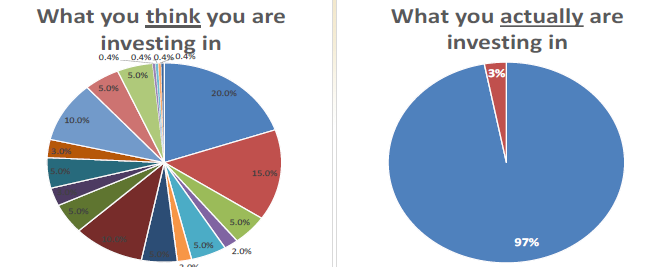
Following are the 3 high level tasks
   - Fit Stock for given trade and other historical infromation , and come up with effective model to represent the stock
   - Assign a class/cluster to stocks based on the model learned in task 1 
   - Investor input of his/her existing portfolio and the new investment ,he/she is interested in, and use of clustering model to diversify 
   
**Task #1: Fit Stock for given trade and other historical infromation , and come up with effective model to represent the stock**  -  In this task , we have treding data for S&P 500 stocks and for every stock, we are evaluating multiple regression models with hyper parameter tuning to find a best fit model. 

**Task #2 Clustering of stocks** - In this task, training data is the feature coefficients of the regression models from Task#1 , i.e. 500 stocks * 6 features coefficients . Using this training data , we are trying to classify/cluster stocks in different similarity groups.

**Task#3 Taking investor's portfolio details and the new stock , he/she is interested in** - In this task , we are going to use the clustering and regression model which we learned in Task #1 & #2.  For investor's current portfolio , we will find out the clusters with most of the investments and if the new stock also belongs to the cluster with high coverage , we will suggest to invest in some other stock otherwise will give a go ahead. 


**Project Team :**

This project is executed by a group of 3 members. Below are the members names:
                         
    * Rohan Kayan                    2000331378
    * Sathish Nandakumar             2000319482
    * Khaled Abou Samak              2000277173

## Contents:

   #### 1. Grab and load the data
           1.1 Data and features description
           1.2 Load pre downloaded CSV
  #### 2. EDA (Exploratory Data Analysis)
  #### 3. Regression Model for Stock representation
              3.1 Baseline Model for Normalization & Regression 
                  3.1.1 Normalize the data and execute Linear Regression
                  3.1.2 Normalize the data and execute Linear SVR
                  3.1.3 Normalize the data and execute RBF SVR
                  3.1.4 Normalize the data and execute Decision Tree Regressor
           3.2 Baseline Model for Standardization & Regression
                  3.2.1 Standardize the data and execute Linear SVR
                  3.2.2 Standardize the data and execute RBF SVR
                  3.2.3 Standardize the data and execute Decision Tree Regression
                  3.2.4 Standardize the data and execute Ridge Regression
                  3.2.5 Standardize the data and execute Lasso Regression
              3.3 Fine Tune Model
                  3.3.1 Linear Regression using Cross Validation
                  3.3.2 Fine tune Decision Tree
                  3.3.3 Fine tune SVM Regression using Random Search
   #### 4 Metrics 
                4.1 RMSE for Regularization
                4.2  MAE for Regression
                4.3 RMSE for Regression
                4.4 RMSE for All stocks 
   #### 5  Statistics Significance test 
   #### 6  Classification Model of Stocks 
                6.1 KNN Classification of Stock Movement
   #### 7 Clustering Model of Stocks 
                7.1 K-Means model using K-mean++ for deciding number of clusters 
  #### 8. Success / Failure analysis
 
  #### 9. User interaction and usecases 

### 1. Grab and load the data

#### 1.1 Data and Features Description

The data is presented 5 years of stock data for 500 S&P stocks. The dataset is taken from Kaggle public dataset (https://www.kaggle.com/camnugent/sandp500).


All stocks has following columns: 
* Date - in format: yy-mm-dd 
* Open - price of the stock at market open (this is NYSE data so all in USD)
* High - Highest price reached in the day
* Low Close - Lowest price reached in the day
* Volume - Number of shares traded
* Name - the stock's ticker name

#### 1.2 Load pre-downloaded csv file

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

import pandas as pd
from pandas import read_csv
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

In [2]:
#Read the data
filename = '../input/sandp500/all_stocks_5yr.csv'
stock = read_csv(filename)
print("***Structure of data with all its features***")
stock.head()

***Structure of data with all its features***


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


### 2. EDA (Exploratory Data Analysis)

##### Checking number of stock records and features for a specific stock 'AAPL'

In [3]:
ticker_name = 'AAPL'
stock_a = stock[stock['Name'] == ticker_name]
stock_a.shape

(1259, 7)

##### Check for null values to plan for pre-processing of data

In [4]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
date      619040 non-null object
open      619029 non-null float64
high      619032 non-null float64
low       619032 non-null float64
close     619040 non-null float64
volume    619040 non-null int64
Name      619040 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


##### Check the distribution of data to understand variance in features to plan for scaling

In [5]:
stock_a.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


##### Adding the new features to understand the price variations of stock within a day and from previous day, these additional features will help in predicting the day close stock price with atmost accuracy as well as these features helps the model to classsify the volatility of a stock

In [6]:
stock_a['changeduringday'] = ((stock['high'] - stock['low'] )/ stock['low'])*100

stock_a['changefrompreviousday'] = (abs(stock_a['close'].shift() - stock_a['close'] )/ stock['close'])*100


In [7]:
print("**The new features 'changeduring day & change from previous day are added to the dataset. Note: The first row for change from previous day for each stock is NA or blank always")
stock_a.head()

**The new features 'changeduring day & change from previous day are added to the dataset. Note: The first row for change from previous day for each stock is NA or blank always


,date,open,high,low,close,volume,Name,changeduringday,changefrompreviousday
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,2.255250,NaN
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,2.470155,1.031484
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,3.129130,2.571107
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,2.249517,0.190660
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,1.642215,0.090015


 ##### Let's see graphical representation of the distribution of one stock

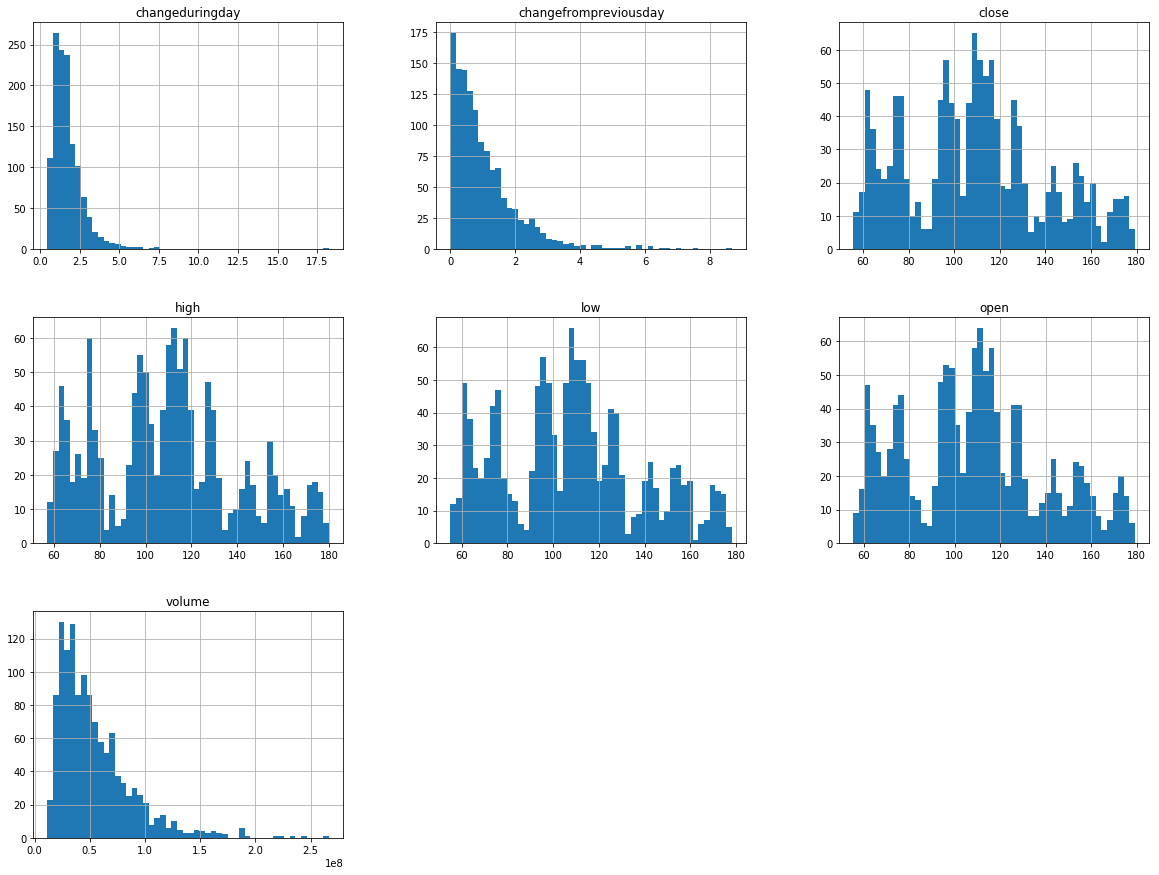

In [8]:
stock_a.hist(bins=50, figsize=(20,15))
plt.show()

##### Variations in day close price of the stock AAPL

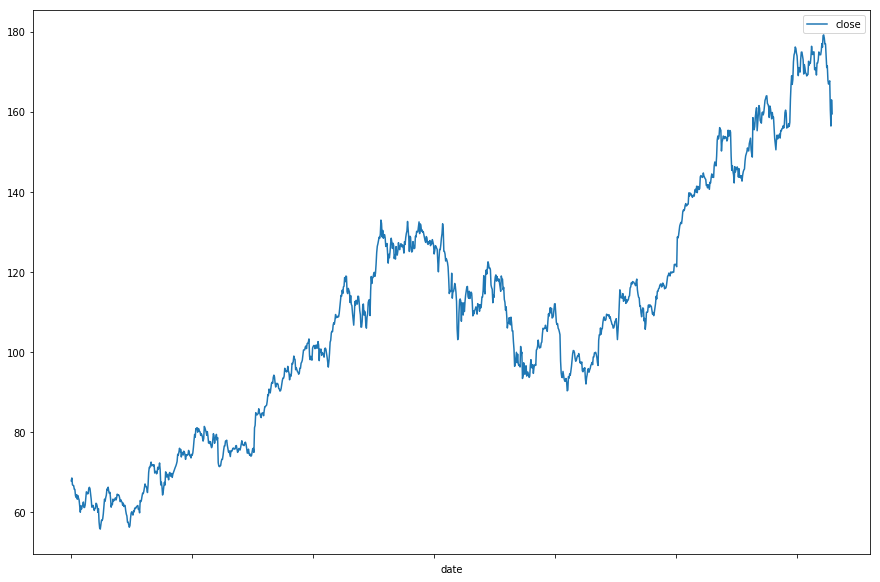

In [9]:
stock_a.plot(kind="line", x="date", y="close", figsize=(15, 10))

##### Building the correlation matirix to know the correlation bewtween close price(target) and the other features

In [10]:
corr_matrix = stock_a.corr()

In [11]:
corr_matrix["close"].sort_values(ascending=False)

close                    1.000000
low                      0.999614
high                     0.999584
open                     0.999118
changefrompreviousday   -0.099145
changeduringday         -0.176314
volume                  -0.620290
Name: close, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a7de10c18>,
      dtype=object)

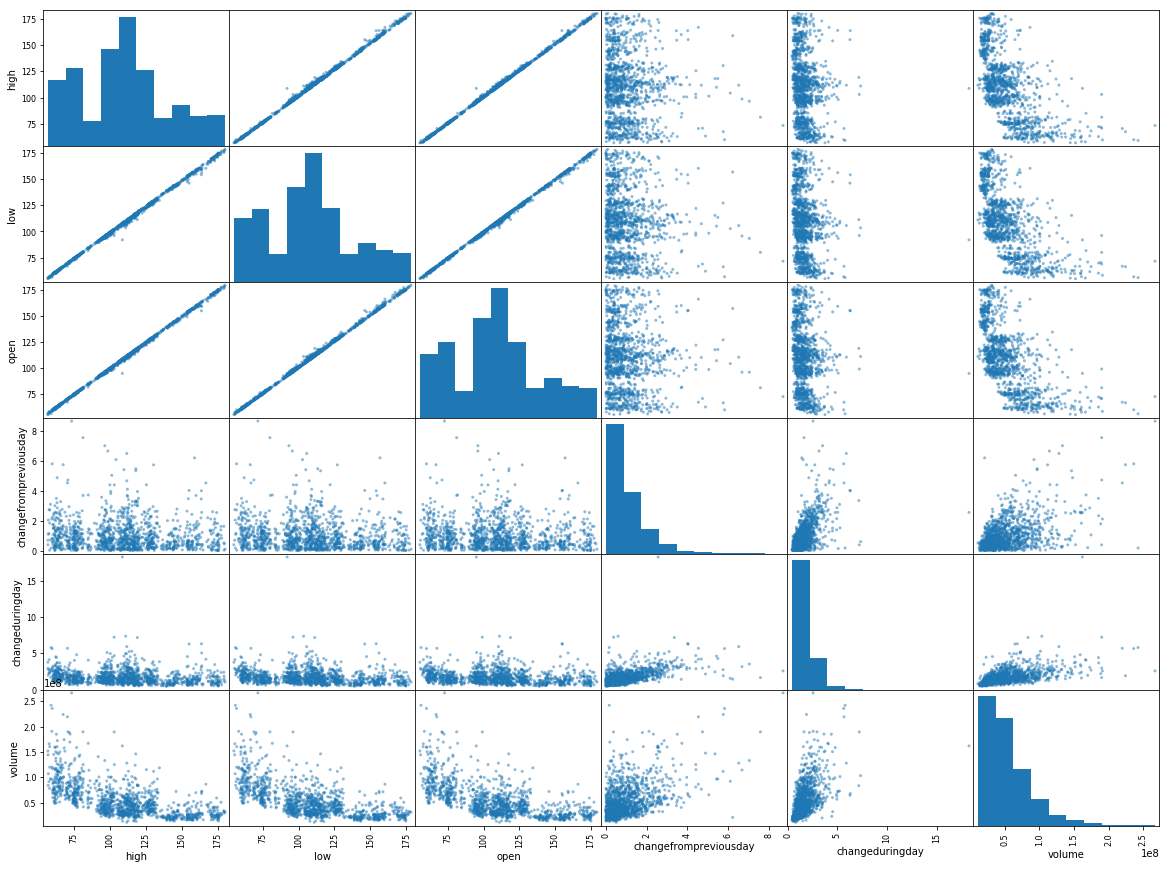

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["high", "low", "open", "changefrompreviousday", "changeduringday", "volume"]

scatter_matrix(stock_a[attributes], figsize=(20, 15))

##### Heap map for the feature correlation

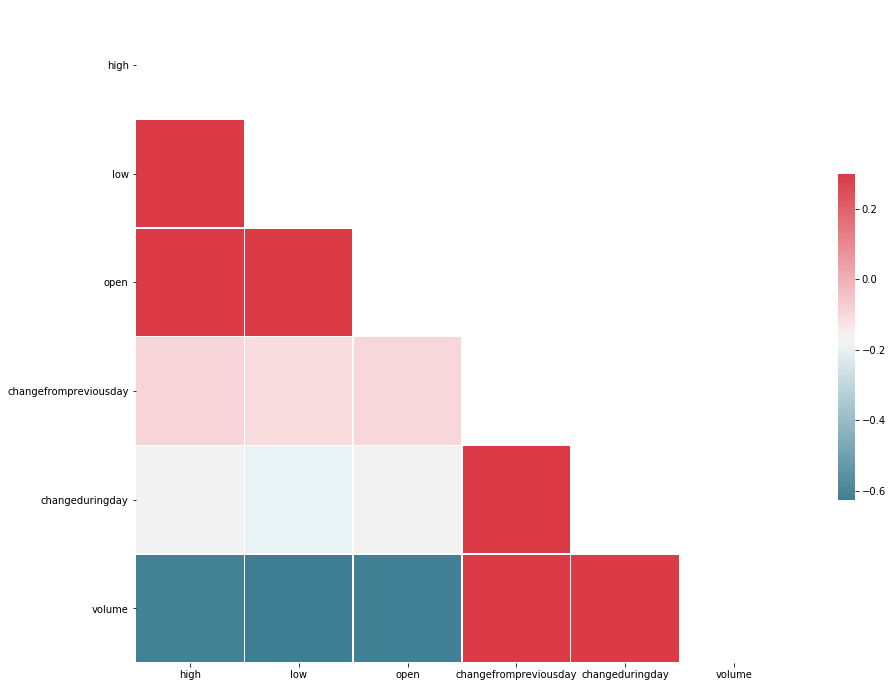

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
corr = stock_a[["high", "low", "open", "changefrompreviousday", "changeduringday", "volume"]].corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

#### 3. Regression model for stock representation

##### Create heldout dataset by splitting the AAPL stock into train and test using Scikit-Learn's train_test_split. Also remove the 'date' & 'name' features from the dataset as it has least significance in prediction day close stock price. Also remove the target feature close from input features and add it to target feature to measure prediction accuracy

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,Normalizer
X_stock_a = stock_a.drop(['date', 'Name','close'], axis=1)
y_stock_a = stock_a['close']

X_stock_train, X_stock_test, y_stock_train, y_stock_test = train_test_split(X_stock_a, y_stock_a, test_size=0.2, 
                                                                            random_state=42)


### 3.1 Baseline Model for Normalization & Regression

In [15]:
#Data prep pipeline
data_pipeline = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('scaler',StandardScaler())
#        ('normalizer', Normalizer()),
    ])

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


#### 3.1.1 Normalize the data and execute Linear Regression

In [16]:
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,Normalizer

from sklearn.pipeline import Pipeline

Lr_pipeline_nor = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('normalizer',Normalizer()),
        ('lr', LinearRegression())
        
    ])

Lr_pipeline_nor.fit(X_stock_train, y_stock_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('normalizer', Normalizer(copy=True, norm='l2')), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

#### 3.1.2 Normalize the data and execute Linear SVR 

In [17]:
from sklearn.svm import SVR
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

svr_pipeline_nor = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('normalizer',Normalizer()),
        ('svr', SVR(kernel="linear"))
        
    ])

svr_pipeline_nor.fit(X_stock_train, y_stock_train)


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('normalizer', Normalizer(copy=True, norm='l2')), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

#### 3.1.3 Normalize the data and execute RBF SVR

In [18]:
from sklearn.svm import SVR
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

svrrbf_pipeline_nor = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('normalizer',Normalizer()),
        ('svr', SVR(kernel="rbf"))
        
    ])

svrrbf_pipeline_nor.fit(X_stock_train, y_stock_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('normalizer', Normalizer(copy=True, norm='l2')), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

#### 3.1.4 Normalize the data and execute Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

tree_reg = DecisionTreeRegressor(random_state=42)
dt_pipeline_nor = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('normalizer',Normalizer()),
        ('dt', DecisionTreeRegressor(random_state=42))
        
    ])

dt_pipeline_nor.fit(X_stock_train, y_stock_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('normalizer', Normalizer(copy=True, norm='l2')), ('dt', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'))])

### 3.2 Baseline Model for Standardization & Regression

#### 3.2.1 Standardize the data and execute Linear Regression

In [20]:
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Data prep pipeline

Lr_pipeline_std = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('scaler',StandardScaler()),
        ('lr', LinearRegression())
        
    ])

Lr_pipeline_std.fit(X_stock_train, y_stock_train)



/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

#### 3.2.2 Standardize the data and execute Linear SVR

In [21]:
from sklearn.svm import SVR
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

svr_pipeline_std = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('scaler',StandardScaler()),
        ('svr', SVR(kernel="linear"))
        
    ])

svr_pipeline_std.fit(X_stock_train, y_stock_train)


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

#### 3.2.3 Standardize the data and execute RBF SVR[](http://)

In [22]:
from sklearn.svm import SVR
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

svrrbf_pipeline_std = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('scaler',StandardScaler()),
        ('svrrbf', SVR(kernel="rbf"))
        
    ])

svrrbf_pipeline_std.fit(X_stock_train, y_stock_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svrrbf', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

#### 3.2.4 Standardize the data and execute Decision Tree Regression

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

tree_reg = DecisionTreeRegressor(random_state=42)
dt_pipeline_std = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('scaler',StandardScaler()),
        ('dt', DecisionTreeRegressor(random_state=42))
        
    ])

dt_pipeline_std.fit(X_stock_train, y_stock_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dt', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'))])

#### 3.2.5 Standardize the data and execute Ridge Regression

In [24]:
#Doing Regularization Ridge 

#1. Fine tune Ridge Regression using Random search
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection  import cross_validate

pipeline = Pipeline([('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('scaler',StandardScaler()),
    ('RidgeReg', Ridge()),
])

param_distribs = {#listed in the form of "pipelineStep__parameter", e.g, "RidgeLogReg__alpha":(100., 10., 1.,0.1)
    "RidgeReg__alpha":(1e2, 1e1, 1., 1e-1, 1e-2, 1e-3, 1e-4),
    "RidgeReg__fit_intercept":(True,False)
}


rnd_search_ridge_cv=  RandomizedSearchCV(pipeline, param_distribs,
                                 cv=10, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=-1)

rnd_search_ridge_cv.fit(X_stock_train, y_stock_train)


#Mean CV scores for Ridge
ridgescores = rnd_search_ridge_cv.cv_results_
for mean_score, params in zip(ridgescores["mean_test_score"], ridgescores["params"]):
    print(np.sqrt(-mean_score), params)
print ('Best CV score for Ridge: ', -rnd_search_ridge_cv.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/depr

109.43641676183681 {'RidgeReg__fit_intercept': False, 'RidgeReg__alpha': 1.0}
0.8783874806536163 {'RidgeReg__fit_intercept': True, 'RidgeReg__alpha': 10.0}
109.43749223193423 {'RidgeReg__fit_intercept': False, 'RidgeReg__alpha': 10.0}
0.5253905556858669 {'RidgeReg__fit_intercept': True, 'RidgeReg__alpha': 0.01}
109.43484437334068 {'RidgeReg__fit_intercept': False, 'RidgeReg__alpha': 0.1}
109.43450123832282 {'RidgeReg__fit_intercept': False, 'RidgeReg__alpha': 0.0001}
1.5712655597471468 {'RidgeReg__fit_intercept': True, 'RidgeReg__alpha': 100.0}
109.43452995324525 {'RidgeReg__fit_intercept': False, 'RidgeReg__alpha': 0.01}
0.5260514347612655 {'RidgeReg__fit_intercept': True, 'RidgeReg__alpha': 0.001}
109.44535857076052 {'RidgeReg__fit_intercept': False, 'RidgeReg__alpha': 100.0}
Best CV score for Ridge:  0.27603523600390395


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.5s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [25]:
from sklearn.metrics import mean_squared_error

rnd_search_stock_predictions = rnd_search_ridge_cv.best_estimator_.predict(X_stock_test)
rnd_search_mse = mean_squared_error(y_stock_test, rnd_search_stock_predictions)
rnd_search_rmse = np.sqrt(rnd_search_mse)
print('Ridge regression best estimator RMSE with Standardization', rnd_search_rmse)

Ridge regression best estimator RMSE with Standardization 0.5646413651655466


#### 3.2.6 Standardize the data and execute Lasso Regression

In [26]:
#Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('scaler',StandardScaler()),
    ('LassoReg', Lasso()),
])

param_distribs = {
    "LassoReg__alpha":(1e2, 1e1, 1., 1e-1, 1e-2, 1e-3, 1e-4),
    "LassoReg__fit_intercept":(True,False)
}


rnd_search_lasso_cv = RandomizedSearchCV(pipeline, param_distribs,
                                 cv=10, n_iter=10,scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=-1,random_state=42)

rnd_search_lasso_cv.fit(X_stock_train, y_stock_train)


#Mean CV scores for Lasso
Lasscores = rnd_search_lasso_cv.cv_results_
for mean_score, params in zip(Lasscores["mean_test_score"], Lasscores["params"]):
    print(np.sqrt(-mean_score), params)
print ('Best CV score for Lasso: ', -rnd_search_lasso_cv.best_score_)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/depr

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was 

109.43789105257275 {'LassoReg__fit_intercept': False, 'LassoReg__alpha': 0.01}
109.4381637361038 {'LassoReg__fit_intercept': False, 'LassoReg__alpha': 0.001}
30.61047676573831 {'LassoReg__fit_intercept': True, 'LassoReg__alpha': 100.0}
0.8737398925521838 {'LassoReg__fit_intercept': True, 'LassoReg__alpha': 0.0001}
109.44051962920537 {'LassoReg__fit_intercept': False, 'LassoReg__alpha': 1.0}
0.8692203546294673 {'LassoReg__fit_intercept': True, 'LassoReg__alpha': 0.01}
10.041539790910855 {'LassoReg__fit_intercept': True, 'LassoReg__alpha': 10.0}
113.628410481702 {'LassoReg__fit_intercept': False, 'LassoReg__alpha': 100.0}
109.43817460374947 {'LassoReg__fit_intercept': False, 'LassoReg__alpha': 0.0001}
1.2976774034035339 {'LassoReg__fit_intercept': True, 'LassoReg__alpha': 1.0}
Best CV score for Lasso:  0.7555440249021769


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was 

In [27]:
rnd_search_lasso_stock_predictions = rnd_search_lasso_cv.best_estimator_.predict(X_stock_test)
rnd_search_lasso_mse = mean_squared_error(y_stock_test, rnd_search_lasso_stock_predictions)
rnd_search_lasso_rmse = np.sqrt(rnd_search_lasso_mse)
print('Lasso regression best estimator RMSE with Standardization', rnd_search_lasso_rmse)

Lasso regression best estimator RMSE with Standardization 0.8515642192625397


### 3.3 Fine Tune Model

#### 3.3.1 Linear Regression using Cross Validation

In [28]:


#1. Fine tune Linear Regression using Random search
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


lin_reg = LinearRegression()



X_stock_train = data_pipeline.fit_transform(X_stock_train)

scores = cross_validation.cross_val_score(lin_reg, X_stock_train, y_stock_train, scoring='neg_mean_squared_error', cv=10,)


#Metrics - Mean CV scores for Linear Regression
print (-scores)
print ('Mean score for Linear Regression: ', np.mean(-scores))

NameError: name 'cross_validation' is not defined

#### 3.3.2 Fine tune Decision Tree

In [29]:
#2. Fine tune Decision Tree Regressor using Random search
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
        'max_depth': [1,2,3,4,5,6,7,8,9,10],
    }

tree_reg = DecisionTreeRegressor(random_state=42)
rnd_search_tree = RandomizedSearchCV(tree_reg, param_distributions=param_distribs,
                                n_iter=10, cv=10, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=-1, random_state=42)

X_stock_fe_prep = data_pipeline.transform(X_stock_train)
rnd_search_tree.fit(X_stock_fe_prep, y_stock_train)

#Metrics - Mean CV scores for Decistion Tree
cvres2 = rnd_search_tree.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)
print ('Best CV score for Decision Tree: ', -rnd_search_tree.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


18.759295508773505 {'max_depth': 1}
8.201039903818176 {'max_depth': 2}
4.296510729578418 {'max_depth': 3}
2.3040987227395164 {'max_depth': 4}
1.4750690085730849 {'max_depth': 5}
1.130773559127575 {'max_depth': 6}
1.0096953715299517 {'max_depth': 7}
1.0473330700549246 {'max_depth': 8}
1.022299153970295 {'max_depth': 9}
1.0226759993621193 {'max_depth': 10}
Best CV score for Decision Tree:  1.019484743289007


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


 #### 3.3.3 Fine tune SVM Regression using Random Search

In [30]:
#3. Fine tune SVM regression using Random search


from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal


# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 1000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search_svr = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=10, cv=2, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=-1, random_state=42)
X_stock_fe_prep = data_pipeline.fit_transform(X_stock_train[0:500])
rnd_search_svr.fit(X_stock_fe_prep, y_stock_train[0:500])


#Mean CV scores for SVR
cvres3 = rnd_search_svr.cv_results_
for mean_score, params in zip(cvres3["mean_test_score"], cvres3["params"]):
    print(np.sqrt(-mean_score), params)
print ('Best CV score for SVR: ', -rnd_search_svr.best_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.6s finished


0.527969667338767 {'C': 86.56900442587761, 'gamma': 3.010121430917521, 'kernel': 'linear'}
7.780488180097977 {'C': 422.37831933647874, 'gamma': 0.9084469696321253, 'kernel': 'rbf'}
2.835081160196787 {'C': 36.81798416110504, 'gamma': 0.059838768608680676, 'kernel': 'rbf'}
0.5321646828353502 {'C': 73.78887960837761, 'gamma': 0.15416196746656105, 'kernel': 'linear'}
16.24888297790775 {'C': 21.67716253868949, 'gamma': 3.503557475158312, 'kernel': 'rbf'}
0.8848298717688163 {'C': 786.3264704747313, 'gamma': 0.0007790692366582295, 'kernel': 'rbf'}
5.5590413452013 {'C': 40.985360230834694, 'gamma': 0.3627537294604771, 'kernel': 'rbf'}
0.5819399034185495 {'C': 20.560583532947476, 'gamma': 0.023332523598323388, 'kernel': 'linear'}
3.806833830275606 {'C': 219.0532549726511, 'gamma': 0.15023452872733867, 'kernel': 'rbf'}
4.8014759481596725 {'C': 902.4256142480963, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}
Best CV score for SVR:  0.2787519696298083


#### 4 Metrics 

#### 4.1 RMSE for Regularization
Calculated RMSE for Lasso and Ridge separately as it was ran thorugh the Cross Validation. The RMSE didn't outperform Linear Regression

In [31]:
#Lasso Regression
lasso_stock_predictions_std = rnd_search_lasso_cv.best_estimator_.predict(X_stock_test)
lasso_mse_std = mean_squared_error(y_stock_test, lasso_stock_predictions_std)
lasso_rmse_std = np.sqrt(lasso_mse_std)
print('Lasso Regression RMSE with Standardization', lasso_rmse_std)

#Ridge Regression
ridge_stock_predictions_std = rnd_search_ridge_cv.best_estimator_.predict(X_stock_test)
ridge_mse_std = mean_squared_error(y_stock_test, ridge_stock_predictions_std)
ridge_rmse_std = np.sqrt(ridge_mse_std)
print('Ridge Regression RMSE with Standardization', ridge_rmse_std)



Lasso Regression RMSE with Standardization 0.8515642192625397
Ridge Regression RMSE with Standardization 0.5646413651655466


#### 4.2  MAE for Regression
##### We tried Mean Absolute Error to understand how the metrics look but we use RMSE for the actual accuracy measurement of our model

In [32]:
from sklearn.metrics import mean_absolute_error

#Linear Regression with normalisation and standardisation
lr_stock_predictions_nor = Lr_pipeline_nor.predict(X_stock_test)
lr_mae_nor = mean_absolute_error(y_stock_test, lr_stock_predictions_nor)
print('Lr MAE with Normalization', lr_mae_nor)

lr_stock_predictions_std = Lr_pipeline_std.predict(X_stock_test)
lr_mae_std = mean_absolute_error(y_stock_test, lr_stock_predictions_std)
print('Lr MAE with standardization', lr_mae_std)

#SVM with normalisation and standardisation
svm_stock_predictions_nor = svr_pipeline_nor.predict(X_stock_test)
svm_mae_nor = mean_absolute_error(y_stock_test, svm_stock_predictions_nor)
print('SVM MAE with Normalization', svm_mae_nor)

svm_stock_predictions_std = svr_pipeline_std.predict(X_stock_test)
svm_mae_std = mean_absolute_error(y_stock_test, svm_stock_predictions_std)
print('SVM MAE with standardization', svm_mae_std)


#SVM with RFB Kernel with normalisation and standardisation
svmrbf_stock_predictions_nor = svrrbf_pipeline_nor.predict(X_stock_test)
svmrbf_mae_nor = mean_absolute_error(y_stock_test, svmrbf_stock_predictions_nor)
print('SVM RBF MAE with Normalization', svmrbf_mae_nor)


svmrbf_stock_predictions_std = svrrbf_pipeline_std.predict(X_stock_test)
svmrbf_mae_std = mean_absolute_error(y_stock_test, svmrbf_stock_predictions_std)
print('SVM RBF MAE with standardization', svmrbf_mae_std)

#Decision Tree with normalisation and standardisation
dt_stock_predictions_nor = dt_pipeline_nor.predict(X_stock_test)
dt_mae_nor = mean_absolute_error(y_stock_test, dt_stock_predictions_nor)
print('DecisionTree MAE with Normalization', dt_mae_nor)

dt_stock_predictions_std = dt_pipeline_std.predict(X_stock_test)
dt_mae_std = mean_absolute_error(y_stock_test, dt_stock_predictions_std)
print('DecisionTree MAE with standardization', dt_mae_std)


#Lasso Regression
lasso_stock_predictions_std = rnd_search_lasso_cv.best_estimator_.predict(X_stock_test)
lasso_mae_std = mean_absolute_error(y_stock_test, lasso_stock_predictions_std)
print('Lasso Regression MAE with Standardization', lasso_mae_std)

#Ridge Regression
ridge_stock_predictions_std = rnd_search_ridge_cv.best_estimator_.predict(X_stock_test)
ridge_mae_std = mean_absolute_error(y_stock_test, ridge_stock_predictions_std)
print('Ridge Regression MAE with Standardization', ridge_mae_std)



Lr MAE with Normalization 7.96468285357763
Lr MAE with standardization 0.40104631920463285
SVM MAE with Normalization 24.466137692495213
SVM MAE with standardization 0.5230084043340691
SVM RBF MAE with Normalization 24.4661376964402
SVM RBF MAE with standardization 3.2288860882520902
DecisionTree MAE with Normalization 23.327932325191004
DecisionTree MAE with standardization 0.7457000000000006
Lasso Regression MAE with Standardization 0.6079135279175469
Ridge Regression MAE with Standardization 0.40017618994229726


#### 4.3 RMSE for Regression
#####  RMSE for all of the models (including Regularization , Standardization and normalization) 

In [33]:
import pandas as pd
import numpy as np

#Predict and report RMSE
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_squared_error

#Linear Regression with normalisation and standardisation
lr_stock_predictions_nor = Lr_pipeline_nor.predict(X_stock_test)
lr_mse_nor = mean_squared_error(y_stock_test, lr_stock_predictions_nor)
lr_rmse_nor = np.sqrt(lr_mse_nor)
print('Lr RMSE with Normalization', lr_rmse_nor)

lr_stock_predictions_std = Lr_pipeline_std.predict(X_stock_test)
lr_mse_std = mean_squared_error(y_stock_test, lr_stock_predictions_std)
lr_rmse_std = np.sqrt(lr_mse_std)
print('Lr RMSE with standardization', lr_rmse_std)

#SVM with normalisation and standardisation
svm_stock_predictions_nor = svr_pipeline_nor.predict(X_stock_test)
svm_mse_nor = mean_squared_error(y_stock_test, svm_stock_predictions_nor)
svm_rmse_nor = np.sqrt(svm_mse_nor)
print('SVM RMSE with Normalization', svm_rmse_nor)

svm_stock_predictions_std = svr_pipeline_std.predict(X_stock_test)
svm_mse_std = mean_squared_error(y_stock_test, svm_stock_predictions_std)
svm_rmse_std = np.sqrt(svm_mse_std)
print('SVM RMSE with standardization', svm_rmse_std)


#SVM with RFB Kernel with normalisation and standardisation
svmrbf_stock_predictions_nor = svrrbf_pipeline_nor.predict(X_stock_test)
svmrbf_mse_nor = mean_squared_error(y_stock_test, svmrbf_stock_predictions_nor)
svmrbf_rmse_nor = np.sqrt(svmrbf_mse_nor)
print('SVM RBF RMSE with Normalization', svmrbf_rmse_nor)


svmrbf_stock_predictions_std = svrrbf_pipeline_std.predict(X_stock_test)
svmrbf_mse_std = mean_squared_error(y_stock_test, svmrbf_stock_predictions_std)
svmrbf_rmse_std = np.sqrt(svmrbf_mse_std)
print('SVM RBF RMSE with standardization', svmrbf_rmse_std)

#Decision Tree with normalisation and standardisation
dt_stock_predictions_nor = dt_pipeline_nor.predict(X_stock_test)
dt_mse_nor = mean_squared_error(y_stock_test, dt_stock_predictions_nor)
dt_rmse_nor = np.sqrt(dt_mse_nor)
print('DecisionTree RMSE with Normalization', dt_rmse_nor)

dt_stock_predictions_std = dt_pipeline_std.predict(X_stock_test)
dt_mse_std = mean_squared_error(y_stock_test, dt_stock_predictions_std)
dt_rmse_std = np.sqrt(dt_mse_std)
print('DecisionTree RMSE with standardization', dt_rmse_std)


#Lasso Regression
lasso_stock_predictions_std = rnd_search_lasso_cv.best_estimator_.predict(X_stock_test)
lasso_mse_std = mean_squared_error(y_stock_test, lasso_stock_predictions_std)
lasso_rmse_std = np.sqrt(lasso_mse_std)
print('Lasso Regression RMSE with Standardization', lasso_rmse_std)

#Ridge Regression
ridge_stock_predictions_std = rnd_search_ridge_cv.best_estimator_.predict(X_stock_test)
ridge_mse_std = mean_squared_error(y_stock_test, ridge_stock_predictions_std)
ridge_rmse_std = np.sqrt(ridge_mse_std)
print('Ridge Regression RMSE with Standardization', ridge_rmse_std)

lr_std = ['1',"Linear Regression with standardisation",np.round(lr_rmse_std,3),np.round(lr_mae_std,3)]
lr_nor = ['2',"Linear Regression with normalisation",np.round(lr_rmse_nor,3),np.round(lr_mae_nor,3)]
dt_std = ['3',"Decision Tree with standardisation",np.round(dt_rmse_std,3),np.round(dt_mae_std,3)]
dt_nor = ['4',"Decision Tree with normalisation",np.round(dt_rmse_nor,3),np.round(dt_mae_nor,3)]

svm_std = ['5',"SVM with standardisation",np.round(svm_rmse_std,3),np.round(svm_mae_std,3)]
svm_nor = ['6',"SVM with normalisation",np.round(svm_rmse_nor,3),np.round(svm_mae_nor,3)]

svmrfb_std = ['7',"SVM RFB with standardisation",np.round(svmrbf_rmse_std,3),np.round(svmrbf_mae_std,3)]
svmrfb_nor = ['8',"SVM RFB with normalisation",np.round(svmrbf_rmse_nor,3),np.round(svmrbf_mae_nor,3)]
ridge_std = ['9',"Ridge Regression with standardisation",np.round(ridge_rmse_std,3),np.round(ridge_mae_std,3)]
lasso_std = ['10',"Lasso Regression with standardisation",np.round(lasso_rmse_std,3),np.round(lasso_mae_std,3)]


linear_model_result= pd.DataFrame([lr_std,lr_nor,dt_std,dt_nor,svm_std,svm_nor,svmrfb_std,svmrfb_nor,ridge_std,lasso_std],columns=[ "ExpID", "Model", "RMSE","MAE"])

linear_model_result

Lr RMSE with Normalization 9.798470054390442
Lr RMSE with standardization 0.5672789642782876
SVM RMSE with Normalization 30.35749136672001
SVM RMSE with standardization 0.7298550488461604
SVM RBF RMSE with Normalization 30.357491371346057
SVM RBF RMSE with standardization 7.591106524690999
DecisionTree RMSE with Normalization 29.301370231529017
DecisionTree RMSE with standardization 1.1779024158519418
Lasso Regression RMSE with Standardization 0.8515642192625397
Ridge Regression RMSE with Standardization 0.5646413651655466


,ExpID,Model,RMSE,MAE
0,1,Linear Regression with standardisation,0.567,0.401
1,2,Linear Regression with normalisation,9.798,7.965
2,3,Decision Tree with standardisation,1.178,0.746
3,4,Decision Tree with normalisation,29.301,23.328
4,5,SVM with standardisation,0.730,0.523
5,6,SVM with normalisation,30.357,24.466
6,7,SVM RFB with standardisation,7.591,3.229
7,8,SVM RFB with normalisation,30.357,24.466
8,9,Ridge Regression with standardisation,0.565,0.400
9,10,Lasso Regression with standardisation,0.852,0.608


  #### 4.4 RMSE for All stocks 
  

Run prediction using different models which were fitted above and calculate metrics in loop for the list of stocks . This will give use the name of the model giving best RMSE. If we check the result for most of the stocks Linear regression with Standardization is the best model . So for our clustering and classification we will use Linear Regresssion model with Standardization.


In [34]:
#function to return all the models for a given ticker
from sklearn.preprocessing import Imputer
    
def allModelsResultForAllStocks():
    
    best_result_per_ticker = pd.DataFrame(columns=['Ticker','Model','RMSE'])
    ticker_list = np.unique(stock["Name"])
    best_result_per_ticker = list()
    for ticker_name in ticker_list:
        result = pd.DataFrame(columns=['Ticker','Model','RMSE'])
        stock_a = stock[stock['Name'] == ticker_name]
        #Adding new features 
        #1 Price movement during day time 
        stock_a['changeduringday'] = ((stock['high'] - stock['low'] )/ stock['low'])*100

        #2 Price movement 
        stock_a['changefrompreviousday'] = (abs(stock_a['close'].shift() - stock_a['close'] )/ stock['close'])*100

        X_stock_a = stock_a.drop(['date', 'Name','close'], axis=1)
        y_stock_a = stock_a['close']

        
        imputer = Imputer(missing_values='NaN', strategy='median')
        
        imputer.fit_transform(X_stock_a)
       
        X_stock_train, X_stock_test, y_stock_train, y_stock_test = train_test_split(X_stock_a, y_stock_a, test_size=0.2, 
                                                                                random_state=42)


        Lr_pipeline_std.fit(X_stock_train, y_stock_train)
        Lr_pipeline_nor.fit(X_stock_train, y_stock_train)

        svr_pipeline_nor.fit(X_stock_train, y_stock_train)
        svr_pipeline_std.fit(X_stock_train, y_stock_train)

        svrrbf_pipeline_nor.fit(X_stock_train, y_stock_train)
        svrrbf_pipeline_std.fit(X_stock_train, y_stock_train)


        dt_pipeline_nor.fit(X_stock_train, y_stock_train)
        dt_pipeline_std.fit(X_stock_train, y_stock_train)    
   
        # Predict & Calculate RMSE for all the models 

        #Linear Regression with normalisation and standardisation
        lr_stock_predictions_nor = Lr_pipeline_nor.predict(X_stock_test)
        lr_mse_nor = mean_squared_error(y_stock_test, lr_stock_predictions_nor)
        lr_rmse_nor = np.sqrt(lr_mse_nor)
        rmse_row =   [ticker_name,'Lr RMSE with Normalization', lr_rmse_nor]

        result.loc[-1] = rmse_row  # adding a row
        result.index = result.index + 1  # shifting index
     
    
        lr_stock_predictions_std = Lr_pipeline_std.predict(X_stock_test)
        lr_mse_std = mean_squared_error(y_stock_test, lr_stock_predictions_std)
        lr_rmse_std = np.sqrt(lr_mse_std)
        rmse_row =   [ticker_name,'Lr RMSE with standardization', lr_rmse_std]
    
    

        result.loc[-1] = rmse_row  # adding a row
        result.index = result.index + 1  # shifting index

        #SVM with normalisation and standardisation
        svm_stock_predictions_nor = svr_pipeline_nor.predict(X_stock_test)
        svm_mse_nor = mean_squared_error(y_stock_test, svm_stock_predictions_nor)
        svm_rmse_nor = np.sqrt(svm_mse_nor)
        rmse_row =   [ticker_name,'SVM RMSE with Normalization', svm_rmse_nor]
        

        result.loc[-1] = rmse_row  # adding a row
        result.index = result.index + 1  # shifting index

        svm_stock_predictions_std = svr_pipeline_std.predict(X_stock_test)
        svm_mse_std = mean_squared_error(y_stock_test, svm_stock_predictions_std)
        svm_rmse_std = np.sqrt(svm_mse_std)
        rmse_row =   [ticker_name,'SVM RMSE with standardization', svm_rmse_std]
    
        result.loc[-1] = rmse_row  # adding a row
        result.index = result.index + 1  # shifting index


        #SVM with RFB Kernel with normalisation and standardisation
        svmrbf_stock_predictions_nor = svrrbf_pipeline_nor.predict(X_stock_test)
        svmrbf_mse_nor = mean_squared_error(y_stock_test, svmrbf_stock_predictions_nor)
        svmrbf_rmse_nor = np.sqrt(svmrbf_mse_nor)
        rmse_row =   [ticker_name,'SVM RBF RMSE with Normalization', svmrbf_rmse_nor]
   
        result.loc[-1] = rmse_row  # adding a row
        result.index = result.index + 1  # shifting index


        svmrbf_stock_predictions_std = svrrbf_pipeline_std.predict(X_stock_test)
        svmrbf_mse_std = mean_squared_error(y_stock_test, svmrbf_stock_predictions_std)
        svmrbf_rmse_std = np.sqrt(svmrbf_mse_std)
        rmse_row =   [ticker_name,'SVM RBF RMSE with standardization', svmrbf_rmse_std]
    
        result.loc[-1] = rmse_row  # adding a row
        result.index = result.index + 1  # shifting index

        #Decision Tree with normalisation and standardisation
        dt_stock_predictions_nor = dt_pipeline_nor.predict(X_stock_test)
        dt_mse_nor = mean_squared_error(y_stock_test, dt_stock_predictions_nor)
        dt_rmse_nor = np.sqrt(dt_mse_nor)
        rmse_row =   [ticker_name,'DecisionTree RMSE with Normalization', dt_rmse_nor]

        result.loc[-1] = rmse_row  # adding a row
        result.index = result.index + 1  # shifting index

        dt_stock_predictions_std = dt_pipeline_std.predict(X_stock_test)
        dt_mse_std = mean_squared_error(y_stock_test, dt_stock_predictions_std)
        dt_rmse_std = np.sqrt(dt_mse_std)
        rmse_row = [ticker_name,'DecisionTree RMSE with standardization', dt_rmse_std]
 
        result.loc[-1] = rmse_row  # adding a row
        result.index = result.index + 1  # shifting index
        result = result.sort_values(by = ['RMSE'])
        
       
        best_result_per_ticker.append(np.array(result.iloc[0, :]))
       


    best_result_per_ticker_df = pd.DataFrame(data=best_result_per_ticker, columns=['Ticker','Model','RMSE'])
    
    
    return best_result_per_ticker_df

best_result_per_ticker = allModelsResultForAllStocks()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was 

#### 5  Statistics Significance test 

In [35]:
#Statistics Significance test  

from sklearn.model_selection import cross_val_score
from scipy import stats

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# A sampling based bakeoff using K-fold cross-validation: 
# it randomly splits the training set into K distinct subsets (k=30)
# this bakeoff framework can be used for regression or classification
#Control system is a linear regression based pipeline

kFolds=30

lin_scores = cross_val_score(Lr_pipeline_std, X_stock_train, y_stock_train,
                             scoring="neg_mean_squared_error", cv=kFolds)
control = lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores = cross_val_score(svr_pipeline_std, X_stock_train, y_stock_train,
                         scoring="neg_mean_squared_error", cv=kFolds)
treatment = tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

#paired t-test; two-tailed p-value (aka two-sided)
(t_score, p_value) = stats.ttest_rel(control, treatment)
print("The p-value is %0.5f for a t-score of %0.5f." %(p_value, t_score))
#"The p-value is 0.00019 for a t-score of -4.28218." 


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was 

Scores: [0.48933265 0.63960866 0.29269748 0.50564653 0.59538865 0.42332953
 0.4842434  0.38082912 0.44793622 0.42643303 0.54441415 0.58154951
 0.55341425 0.57358656 0.66199448 0.48044298 0.56677901 0.86165135
 0.36790246 0.41388803 0.67657559 0.41840509 0.53968326 0.44343029
 0.51375043 0.60603642 0.47109019 0.46414375 0.4948605  0.47652579]
Mean: 0.5131856448648772
Standard deviation: 0.10883013188341722


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was 

Scores: [0.72701364 0.81617662 0.56173792 0.72082458 0.76418538 0.61738224
 0.84383079 0.63692736 0.76488483 0.55969705 0.53195726 1.03646812
 0.70225812 0.61787996 0.68666184 0.66921508 0.75883946 0.98713245
 0.5311345  0.72296081 0.96204729 0.7583536  0.60096434 1.03737048
 0.98023901 0.8449231  0.69625658 0.53032541 0.72920602 0.53851932]
Mean: 0.7311791054273578
Standard deviation: 0.15048388140404567
The p-value is 0.00000 for a t-score of -8.71501.


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [36]:
if p_value > 0.05/2:  #Two sided 
    print('There is no significant difference between the two machine learning pipelines (Accept H0)')
else:
    print('The two machine learning pipelines are different (reject H0) \n(t_score, p_value) = (%.2f, %.5f)'%(t_score, p_value) )
    if t_score < 0.0:
        print('Machine learning pipeline Linear regression is better than linear SVR pipeline')
    else:
        print('Machine learning pipeline linear SVR pipeline is better than Linear regression')

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-8.72, 0.00000)
Machine learning pipeline Linear regression is better than linear SVR pipeline


### Feature Importance

> ### All features open, close, high, low, volume, price & change from previous day are important and contributed to the model

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

param_grid = {'fit_intercept':[True,False], 'normalize':[True,False]}

ran_srch = GridSearchCV(lin_reg,param_grid= param_grid,cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)

X_stock_fe_prep1 = data_pipeline.fit_transform(X_stock_train)
ran_srch.fit(X_stock_fe_prep1, y_stock_train)



Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    3.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [38]:
#feature_importances = ran_srch.best_estimator_.feature_importances_
feature_importances = ran_srch.best_estimator_.coef_
feature_importances

array([-1.84490572e+01,  2.61770393e+01,  2.28429093e+01, -1.15721549e-02,
       -6.72337268e-02,  2.92534909e-02])

In [39]:
from sklearn.ensemble import RandomForestRegressor
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6]},
    # then try 6 (2×3) combinations with bootstrap set as False
    #{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

ran_reg = RandomForestRegressor(random_state=42)
ran_srch = GridSearchCV(ran_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)

X_stock_fe_prep1 = data_pipeline.fit_transform(X_stock_train[0:500])
ran_srch.fit(X_stock_fe_prep1, y_stock_train[0:500])


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [40]:
feature_importances = ran_srch.best_estimator_.feature_importances_

feature_importances

array([8.91638311e-02, 4.12108794e-01, 4.98519823e-01, 6.67773246e-05,
       7.30991114e-05, 6.76756981e-05])

  ### 6 . Classification Model of Stocks 

##### We landed on the second section of our project, here we will use the Linear model feature coefficients of all S&P 500 stocks and their target classes(homegrown logic for assigning the class) for training and validation of classififcation model . Once classification model is ready , this model will be used to predict the class of  investor's stock and by this way the model will help investor to diversify his/her portfolio.


In [41]:
#Classification function homegrown logic based on stock price mean variation  
def classify (meanValue):
    if meanValue <=1.5:
        return 'Low'
    elif meanValue >1.5 and  meanValue <=2.5:
        return 'Medium'
    elif meanValue >2.5:
        return 'High'

In [42]:
#function to get linear model for given ticker 

def linearModel(ticker):
    stock_a = stock[stock['Name'] == ticker]
    #Adding new features 
    #1 Price movement during day time 
    stock_a['changeduringday'] = ((stock['high'] - stock['low'] )/ stock['low'])*100

    #2 Price movement 
    stock_a['changefrompreviousday'] = (abs(stock_a['close'].shift() - stock_a['close'] )/ stock['close'])*100

    X_stock_a = stock_a.drop(['date', 'Name','close'], axis=1)
    y_stock_a = stock_a['close']

    Lr_pipeline_std.fit(X_stock_a, y_stock_a)
    
    model = Lr_pipeline_std.named_steps['lr']
    
    return model,stock_a

In [43]:

#using all the 500 stocks for training 
ticker_list = np.unique(stock['Name'])

df = pd.DataFrame(columns=['TICKER','CLASS','Coef for open','Coef for high','Coef for low','Coef for volume','Coef for change within day','Coef for change from prev day'])
for ticker in ticker_list[:50]:
    
    model,stock_a = linearModel(ticker)    
    
    #print("Mean value:",stock_a["changeduringday"].mean())
    #adding target class 
    stock_features = np.concatenate((np.asarray([ticker,classify(stock_a["changeduringday"].mean())]),model.coef_))
    
    df.loc[-1] = stock_features  # adding a row
    df.index = df.index + 1  # shifting index
    df = df.sort_index() 
   
#print(df)

#saving feature coefficients and target class for 500 stocks 
df.to_csv('coeff1.csv', mode='a',header=['TICKER','CLASS','Coef for open','Coef for high','Coef for low','Coef for volume','Coef for change within day','Coef for change from prev day'])
    


#### 6.1 KNN Classification of Stocks based on the linear model coefficients 

##### Split the data into train and testing using Sklearn

In [44]:
# loading libraries
import numpy as np
from sklearn.cross_validation import train_test_split

X_class = np.array(df.ix[:, 2:8]) 
y_class = np.array(df['CLASS']) 


# split into train and test
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

#####  Fit and Predict using KNN classifier with 3 nearest neighbhors

In [45]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train_class, y_train_class)

# predict the response
pred = knn.predict(X_test_class)

# evaluate accuracy
print ("Accuracy of KNN ", accuracy_score(y_test_class, pred))

NameError: name 'X_train_class' is not defined

 ### 7 . Clustering Model of Stocks 

Earlier we manually assigned classes to the training data and used classification model to predict the class of test data. 
Now we are using unsupervised learning (Clustering Method) to split stocks in similar clusters and will use cluster model to predict the cluster for the investor's  stock. 



#### 7.1 K-Means model using K-mean++ for deciding number of clusters 

In [46]:
#Using K-means model to cluster the stocks linear model coefficients 

from sklearn.cluster import KMeans

X_class = np.array(df.ix[:, 2:8]) 	# end index is exclusive

k_mean = KMeans()

#number of clusters will be decided by K-mean++ , by default 
k_mean_model = k_mean.fit(X_class)

print("Number of clusters",k_mean_model.n_clusters) 

Number of clusters 8


In [47]:
#Predicting the cluster assignment for 500 stocks 

#Dropping the CLASS column added as part of classification , we don't need for clustering
df_cluster = df.drop(['CLASS'], axis=1)

#Selecting features from dataframe , there are 6 features 
X_cluster = np.array(df_cluster.ix[:, 1:7])

y_pred = k_mean_model.predict(X_cluster)

pred_df = pd.DataFrame({ 'Stock': df_cluster.ix[:, 0],'Cluster': y_pred})



In [48]:
#Cluster assignment for the stocks , there are total 8 clusters 
pred_df.head(n=20)


,Stock,Cluster
0,ARE,2
1,APTV,7
2,APH,0
3,APD,2
4,APC,2
5,APA,2
6,AOS,0
7,AON,2
8,ANTM,4
9,ANSS,5


### 8. Success / Failure Analysis

####  Finding best model to predict closing price for Stocks 
            *We removed the features 'Name' & 'Date' as the initial testing with these features but after removing these features the model performance has greatly increated 
            *We used regression model to predict the close day stock price, here we tried different methods to pre-process the data by scaling and 
            normalizing
            
            * Normalization is not giving us a better result , as we are training the linear model per stock , using each stock's 5 year of trading data . Results shows it clearly that Standardization is a better fit for us.
            * Based on the RMSE values in the below table, Linear Regression, SVR with Linear kernel performed good with Standardization, but SVR with RBF kernel, Decision Tree performed bad with both standardization and normalization
            * We tried Ridge and Lasso regularization using cross validation to experiment, how the model performs with penalty, these regularizations performed better than SVR with RBF and Decision Tree, however it didn't outperform the Linear Regression with standardization.
            * We did tuning of the model for Linear Regression, SVR with Linear and RBF kernels and Decision Tree regressor, the performance for SVR has improved with Linear kernel after tuning, but Deicsion Tree and Linear regrssion didn't show much difference, however the overall performance on both train and test dataset was better in Linear Regression
            * We performed the Statistics significance test for top 2 models i.e. Linear Regression model and Linear SVR , to find out whether they have significant difference in their performance . And result showed that Linear Regression model is significantly better than linear SVR. 
           * We started with validation of all the models with just 1 stock , then we improved our logic to validate all the model combinations for all the stocks . This validated our assumption that Linear regression with Standardization is the best fitted model for our data.
####  Classification and clustering 
    *We started with homegrown target class assignment and training classification model using that data , and we kept the # of classes as 3 . This model had many limitations. Then we improved our modelling to use Clustering , this way there was no need to assign stocks pre defined classes and # of cluster were also not limited to 3 . 
    *We used K-mean ++ to decide # of clusters 
     

         

#### 9  User interaction and usecases 
#### Task #3 - Interaction with investor and usages of Linear model and clustering models 

In [49]:
#Taking investor's current portfolio in following form 
#[['Stock1','$dollar investment'],['Stock2','$investment']]
#[['AAPL','4000'],['GOOGL','5000'],['GE','7000']]
from pandas import read_csv
stock_portfolio_file = input("Enter the stock portfolio CSV file name (default is portfolio.csv) ?") or '../input/stock-portfolio/stock portfolio.csv'
print(stock_portfolio_file)
      
stock_portfolio_csv = read_csv(stock_portfolio_file)
stock_portfolio_csv.head()

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

In [50]:
#Pie chart for the stock investment distribution based on individual stocks 

import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.size'] = 12.0

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = stock_portfolio_csv['Ticker']
sizes = stock_portfolio_csv['Investment']

fig1, ax1 = plt.subplots(figsize=(12, 10))

patches, texts, autotexts = ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Investment diversification per stock")
plt.legend(patches, labels, loc="best")

plt.show()

NameError: name 'stock_portfolio_csv' is not defined

In [51]:
#Predicting cluster for investor's portfolio stocks based on the clustering model 

pred_stock_portfolio_df = pd.DataFrame(columns=['Ticker','Predicted_cluster','Investment'])

#iterate over all the stock tickers and predict cluster 
for index, row  in stock_portfolio_csv.iterrows():
    customer_stock_model,stock_modified = linearModel(row['Ticker'])
    customer_stock_cluster_pred = k_mean_model.predict([customer_stock_model.coef_])[0]
  
    pred_stock_portfolio_df.loc[len(pred_stock_portfolio_df)] = [row['Ticker'],customer_stock_cluster_pred , row['Investment']]
    
print (pred_stock_portfolio_df)

NameError: name 'stock_portfolio_csv' is not defined

In [52]:
#Grouping the investment per cluster ,as we want investor to balance the investment per cluster 

pred_stock_portfolio_grouped_df =pred_stock_portfolio_df.groupby('Predicted_cluster', as_index=False).agg({"Investment": "sum"})


#for cluster_n in range(k_mean_model.n_clusters):
#   pred_stock_portfolio_df.loc[len(pred_stock_portfolio_df)]= [cluster_n,1]
    

#pred_stock_portfolio_df =pred_stock_portfolio_df.groupby('Predicted_cluster', as_index=False).agg({"Investment": "sum"})
#pred_stock_portfolio_df

pred_stock_portfolio_grouped_df

,Predicted_cluster,Investment


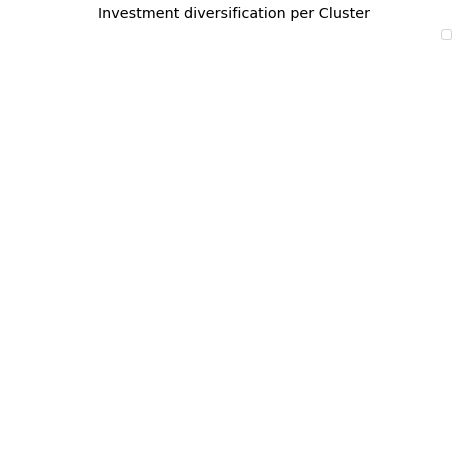

In [53]:
# Pie chart, to show distribution of investment per cluster 
labels = pred_stock_portfolio_grouped_df['Predicted_cluster']
sizes = pred_stock_portfolio_grouped_df['Investment']


fig1, ax1 = plt.subplots(figsize=(8, 8))
patches, texts, autotexts = ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.legend(patches, labels, loc="best")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Investment diversification per Cluster")

plt.show()

In [54]:
#Taking Investors input regarding the new investment she/he wants to make 

stock_customer = input("Enter the stock ticker customer is interested in buying(we will use clustering) ?") or 'AAPL'
print(stock_customer)

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

#### Using classification  model  to predict class of the new stock

In [55]:
customer_stock_model,stock_modified = linearModel(stock_customer)
customer_stock_class_pred = knn.predict([customer_stock_model.coef_])

NameError: name 'stock_customer' is not defined

In [56]:
print("Class Prediction for Investor's new Stock",customer_stock_class_pred)

NameError: name 'customer_stock_class_pred' is not defined

#### Using clustering  model  to predict cluster of the new stock

In [57]:
customer_stock_model,stock_modified = linearModel(stock_customer)

#print(customer_stock_model.coef_)

customer_stock_class_pred = k_mean_model.predict([customer_stock_model.coef_])



NameError: name 'stock_customer' is not defined

In [58]:
print("Cluster for Investor's new Stock:",stock_customer, " is :",customer_stock_class_pred[0])

NameError: name 'stock_customer' is not defined